### PART 3 - TIME SERIES DATA

This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment
rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.

In [516]:
%pip install openpyxl
%pip install statsmodels
%pip install arch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import f
from arch import arch_model

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [517]:
df = pd.read_excel('./textfiles/threecenturies_v2.3.xlsx', sheet_name='A1. Headline series')


In [537]:
#Real GDP at market prices for the period 1900-2000
years = np.arange(1900,2001)
real_GDP = df.loc[246:346, 'A1. Headline Annual Series'].reset_index(drop=True)
real_GDP = real_GDP.rename('Real GDP at market prices')
real_GDP.index = years
real_GDP.astype('float64')

#Unemployment rate for the period 1900-2000
unemp_rate = df.loc[246:346, 'Unnamed: 15']
unemp_rate.index = years
unemp_rate = unemp_rate.rename('Unemployment rate')
unemp_rate.astype('float64')

#Consumer price inflation for the period 1900-2000
cons_price_infl = df.loc[246:346, 'Unnamed: 28'].reset_index(drop=True)
cons_price_infl = cons_price_infl.rename('Consumer price inflation')
cons_price_infl.index = years
cons_price_infl.astype('float64')

1900    4.058273
1901   -0.300000
1902    0.000000
1903    1.103310
1904   -0.396825
          ...   
1996    2.400308
1997    1.824606
1998    1.557398
1999    1.328710
2000    0.796456
Name: Consumer price inflation, Length: 101, dtype: float64

### 27. Define strict and weak stationarity.

A time series is said to be strictly stationary if the joint distribution of any set of observations is invariant under time shifts. In simpler terms, the entire probability distribution of the series remains constant over time. This implies that the mean, variance, and all higher-order moments of the distribution do not change with time. 

A time series is considered weakly stationary if the mean, variance, and autocorrelation structure remain constant over time. So, unlike strict stationarity, weak stationarity allows for shifts in the higher-order moments of the distribution, as long as the first and second moments (mean and variance) are constant.

### 28. Explain ergodicity and state the ergodic theorem. Illustrate with an example. 

In an ergodic system, the statistical properties derived from a single, sufficiently long time series realization are representative of the ensemble average over all possible realizations of the process. In simpler terms, the system explores all its possible states over time, and the long-term behavior of a single trajectory provides meaningful information about the entire system.

The Birkhoff Ergodic Theorem states that, for an ergodic process, the time average of a function along a single trajectory converges to the ensemble average as the length of the observation time increases.
Mathematically, if $X_t$ represents a time series and $f$ is a measurable function, the Birkhoff Ergodic Theorem can be expressed as follows:

$$ lim_{T→∞}\frac{1}{X_T} \int_{0}^{T} f(X_t) \, dt=E[f(X_t)] $$
where $E$ denotes the ensemble average.

Now let's see a simple example. Consider a simple random walk process where the value at each time step is determined by flipping a fair coin. Let $X_t$ be the position of the walker at time $t$, where the walker moves +1 with probability 0.5 and -1 with probability 0.5.

Then $X_t$ could be the position of the walker, i.e., we take $f$ in the previous theorem as the identity function. The ergodic theorem implies that the time average of the position over a long time should converge to the expected position over all possible trajectories. Notice that, as our time serie is discrete, the integral becomes a sum:
$$ lim_{T→∞}\frac{1}{X_T} \sum_{0}^{T} X_t = E(X_t) $$

In this example, the long-term average position of the walker along a single trajectory should converge to zero, as the expected position over all possible trajectories is zero (since the coin is fair, and the expected value of each step is $0.5×1+0.5×(−1)=0$.

### 29. Why do we need both stationarity and ergodicity? 


### 30. Explain “spurious regression”. 


### 31. Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average.

### 32. Make all time series stationary by computing the difference between the original variable and a moving average of order 5.

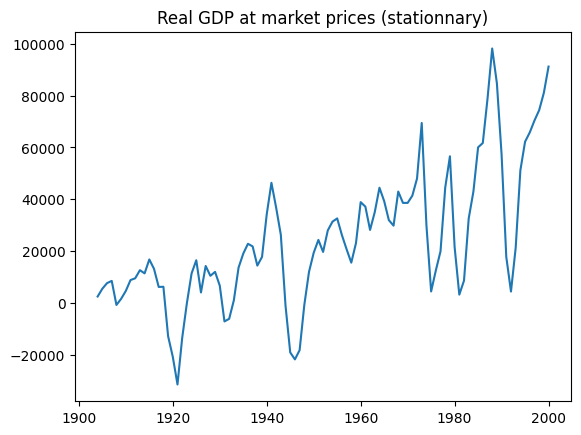

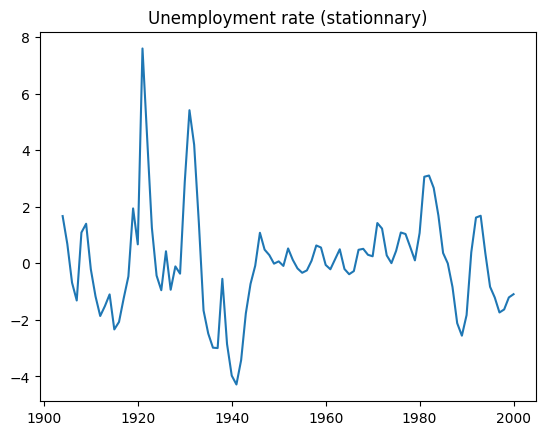

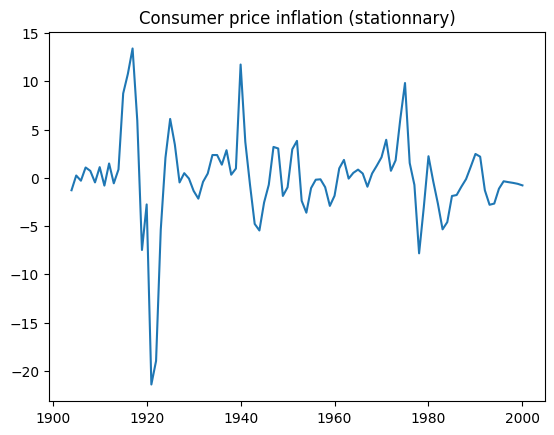

In [538]:
# Compute the moving average of order 5 for real_GDP
moving_avg_real_gdp = real_GDP.rolling(window=5).mean()

real_gdp_stationary = (real_GDP - moving_avg_real_gdp).dropna()

# idem for unemp_rate and cons_price_infl
moving_avg_unemp_rate = unemp_rate.rolling(window=5).mean()
unemp_rate_stationary = (unemp_rate - moving_avg_unemp_rate).dropna()

moving_avg_cons_price_infl = cons_price_infl.rolling(window=5).mean()
price_inf_stationary = (cons_price_infl - moving_avg_cons_price_infl).dropna()

res32 = [real_gdp_stationary, unemp_rate_stationary, price_inf_stationary]

for val in res32 :

    plt.figure()
    plt.title(val.name + ' (stationnary)')
    plt.plot(val)


 ### 33. Compute the difference between the resulting time series of question 32 and a moving average of order 10. Give the exact formula for the weights after the two transformations.

Real GDP at market prices
Unemployment rate
Consumer price inflation


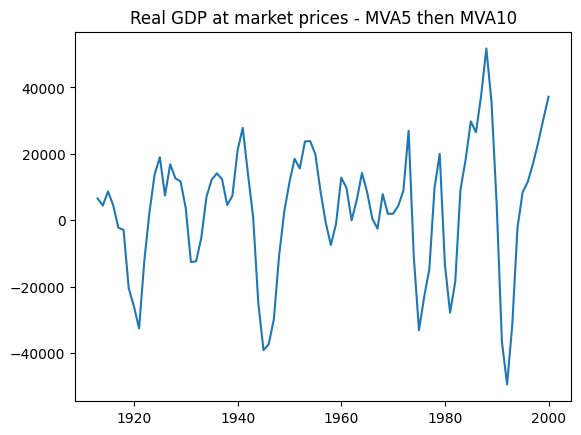

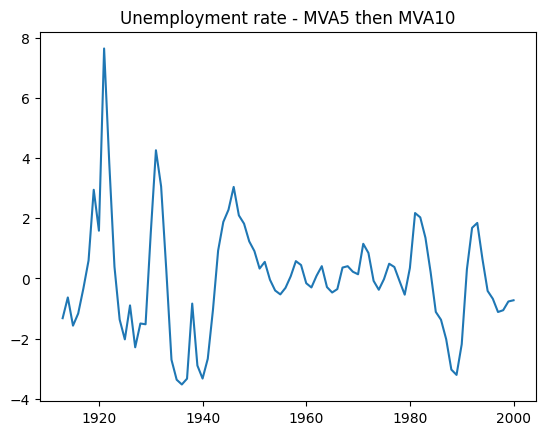

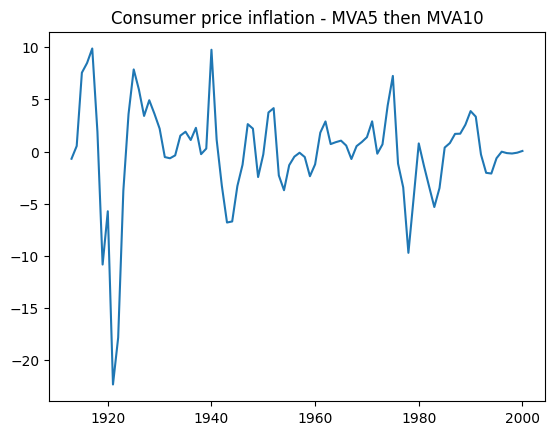

In [539]:
res33 = {}
for val in res32 :
    moving_avg = val.rolling(window=10).mean()
    res33[val.name + ' MVA5 then MVA10'] = (val-moving_avg).dropna()
    plt.figure()
    plt.title(val.name + ' - MVA5 then MVA10')
    print(val.name)
    plt.plot((val-moving_avg).dropna())

real_gdp_stationary = res33['Real GDP at market prices MVA5 then MVA10'].dropna()
price_inf_stationary = res33['Consumer price inflation MVA5 then MVA10'].dropna()
unemp_rate_stationary = res33['Unemployment rate MVA5 then MVA10'].dropna()

### 34. Using the original dataset, test the unit root hypothesis for all variables. 

In [540]:
from statsmodels.tsa.stattools import adfuller


real_GDP_ADF = adfuller(real_GDP)
unemp_rate_ADF = adfuller(unemp_rate)
cons_price_infl_ADF = adfuller(cons_price_infl)

print('ADF Statistic Real GDP: %f' % real_GDP_ADF[0])
print('p-value: %f' % real_GDP_ADF[1])
print('Critical Values:')
for key, value in real_GDP_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: 4.334307
p-value: 1.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
ADF Statistic Unemployment Rate: -2.363203
p-value: 0.152393
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
ADF Statistic Consummer Price Inflation: -4.050359
p-value: 0.001169
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In the case of $\textit{Consumer Price Inflation}$, we observe that the $\textit{ADF Statistic}$ (-4.050359) is lower than all critical values for 1%, 5% 10%
We reject H0 at the significance level 1%, this suggests that there is no unit root. As a result the time series of $\textit{Consumer Price Inflation}$ is most likely stationary. 

On the contrary, for $\textit{Real GDP}$ and the Unemployment Rate, the $\textit{ADF Statistic}$ is higher than the critical values at 1%, 5%, and 10%. Therefore, we cannot reject the null hypothesis of a unit root. In both cases, it may be necessary to explore other methods or transformations to make the time series stationary before modeling them.



### 35. Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34. 


In [541]:
real_GDP_stat_ADF = adfuller(real_gdp_stationary) 
unemp_rate_stat_ADF = adfuller(unemp_rate_stationary) 
cons_price_infl_stat_ADF = adfuller(price_inf_stationary) 

print('ADF Statistic Real GDP: %f' % real_GDP_stat_ADF[0])
print('p-value: %f' % real_GDP_stat_ADF[1])
print('Critical Values:')
for key, value in real_GDP_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_stat_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_stat_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: -5.787468
p-value: 0.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
ADF Statistic Unemployment Rate: -3.035340
p-value: 0.031723
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587
ADF Statistic Consummer Price Inflation: -5.447375
p-value: 0.000003
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585


We now reject the hypothesis H0 for all time series at the significance level 1%

### 36. Explain the difference between ACF and PACF.

ACF : auto-correlation function

ACF describes how a variable in a time series is related to the same variable with a specific lag. It is the auto-correlation of the same 2 variables but in different time frame

$\text{ACF}(k) = \frac{\sum_{t=k+1}^{n}(Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{n}(Y_t - \bar{Y})^2}$


PACF : partial auto-correlation function

Contrary to ACF, PACF takes into account other lags to suppress their influence on the correlation between the 2 points in time




### 37. Plot and comment on the ACF and PACF of all variables. 


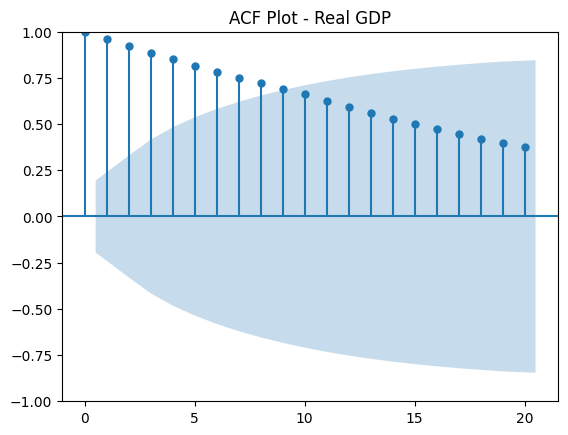

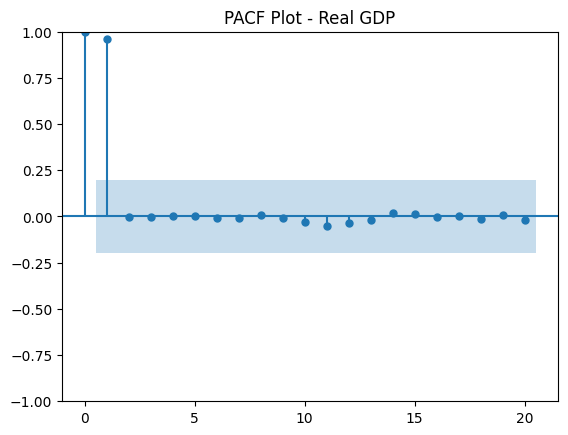

In [542]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute ACF and PACF for real_GDP
plot_acf(real_GDP, lags=20)
plt.title('ACF Plot - Real GDP')
plt.show()
plot_pacf(real_GDP, lags=20)
plt.title('PACF Plot - Real GDP')
plt.show()


The ACF graph shows a slow decay from 1 to 0.5. However, for the PACF, auto-correlation values are nearly all closed to 0 except for lag 1 which is close to 1. The PACF graph suggests that each observation are explained only by their first order lag. This could also explain the slow decay observed in the ACF graph (the auto correlation value would be mainly explained by the correlation of the previous lag).

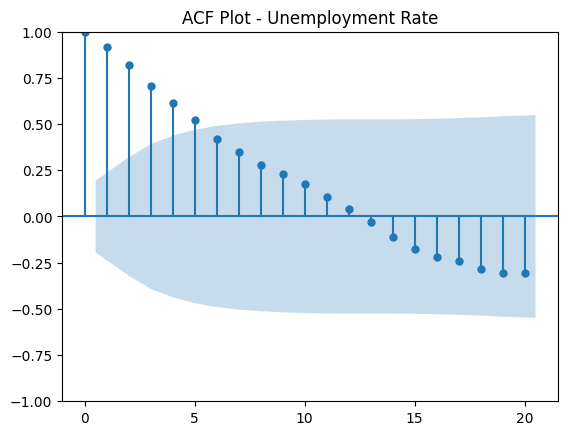

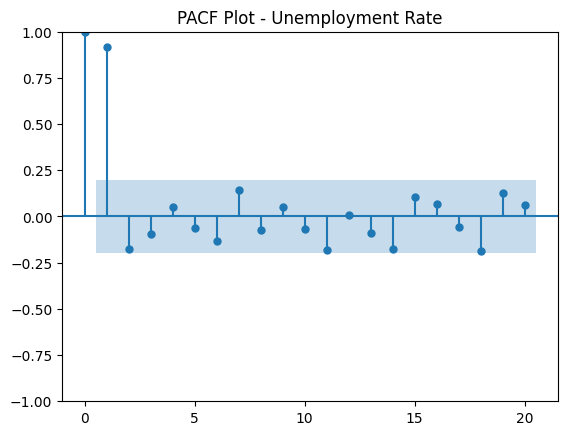

In [543]:
# Compute ACF and PACF for unemp_rate
plot_acf(unemp_rate, lags=20)
plt.title('ACF Plot - Unemployment Rate')
plt.show()
plot_pacf(unemp_rate, lags=20)
plt.title('PACF Plot - Unemployment Rate')
plt.show()

Again, looking at the PACF, auto-correlation values are all close to 0 except for lag 1 which is close to 1. However, compared to the last variable, the correlation values of lag higher than one are a lot bigger ( some > 0.2)

The ACF graph correlation values decrease ~linearly from 1 to -0.30

While the first order lag is highly influential, we now have some significant correlation from lag beyond the first. The faster decline of auto correlation in the ACF graph might suggest that variable are less impacted by past lags compared to the real GDP variable 

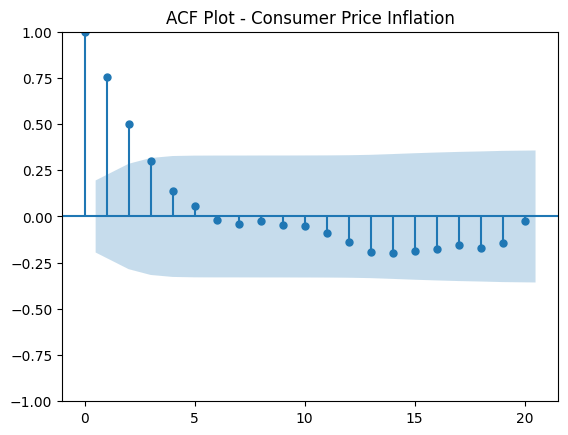

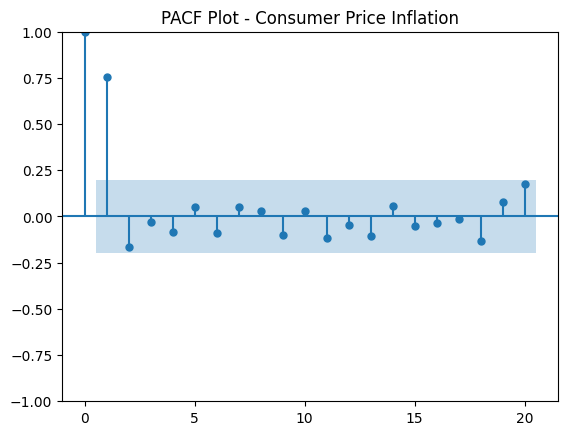

In [544]:
# Compute ACF and PACF for cons_price_infl
plot_acf(cons_price_infl, lags=20)
plt.title('ACF Plot - Consumer Price Inflation')
plt.show()
plot_pacf(cons_price_infl, lags=20)
plt.title('PACF Plot - Consumer Price Inflation')
plt.show()

The decay of the auto-correlation for the ACF graph is again way bigger. Only lag 2 seems to have a noticable correlation (~0.75).

Overall, the 3 varibles have ACF and PACF graph that are mainly the same. They all have a strong auto-correlation for lag 2 which suggests that the variables are only explained by their second order lag. The only main difference is the slope from the decrease of the auto-correlation value in the ACF graph. The decrease is more important for price inflation then unemployment rate and finally GDP. The decrease of the auto-correlation in the ACF graph seems to be proportional to the auto-correlation value of lag 1 in the PACF file wich is expected ( variable are only explained by lag 1).

If we would want to build an auto-regressive model for these 3 variables, AR(1) would be a good choice as only the second order lag has a strong -auto-correlation

### 38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion. 


### 39. Explain the problem of auto-correlation of the errors. 

### 40. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors. 


In [546]:
# Add a constant column to the independent variables
X = sm.add_constant(np.column_stack((unemp_rate_stationary, price_inf_stationary)))

# Fit the regression model
model = sm.OLS(np.asarray(real_gdp_stationary, dtype= 'float64'), np.asarray(X, dtype= 'float64'))
results = model.fit()

dw = sm.stats.stattools.durbin_watson(results.resid)

print("durbin watson test : " + str(dw)) # dw ~ 2(1-r)

print('approximation of the autocorelation residual : ', 1 -dw/2)


durbin watson test : 0.5832755680160248
approximation of the autocorelation residual :  0.7083622159919876


At the significance level 1%, the upper and lower critical values for the durbin watson test are ~ [1.47,1.56] (value retrieved from durbin watson test table), our test statistic is lower than the lower critical value. There is statistical evidence that the error terms are positively auto corrrelated. We reject the hypothesis of no auto-correlation

### 41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40. 


We consider the following model (In the following equations, y, x and z denote GDF, Unemployment and Inflation respectively): $$ y_{t-1} = \beta_0 + \beta_1x_{t-1} + \beta_2z_{t-1} + u_{t-1}$$ $$ y_{t} = \beta_0 + \beta_1x_{t} + \beta_2z_{t} + u_{t}$$ $$ u_t = \rho u_{t-1} + e_t $$ Subtracting the first equation from the second gives : $$y_{t} - \rho y_{t-1} = (1-\rho)\beta_0 + \beta_1(x_t - \rho x_{t-1}) + \beta_2(z_t - \rho z_{t-1}) e_t $$

So, we need to first perform an OLS regression to determine $\rho$ :

In [547]:
# OSL regression of the residuals : 
u = results.resid
n = len(u)
u_1 = u[0:n-1]
const = np.ones(n-1)

X_corr = np.column_stack((const, u_1))
y_corr = u[1:n]

model_corr = sm.OLS(y_corr, X_corr)
results_res = model_corr.fit()

# Computing rho parameter :
rho = results_res.params[1]
print(f'rho : {rho}')

rho : 0.7169695876483774


In [551]:

real_gdp_stationary_arr = np.array(real_gdp_stationary)

resY = real_gdp_stationary_arr[1:] - rho*real_gdp_stationary_arr[:-1]
resX = X[1:] -rho*X[:-1] 


newRow = np.ones(3) *np.sqrt(1-rho**2)* resX[0,:]

resX = np.insert( resX, 0, newRow, axis=0)
newRow = [np.sqrt(1-rho**2)* real_gdp_stationary.iloc[0]]
resY = np.append(newRow, resY)


model_gls = sm.OLS(np.asarray(resY, dtype=np.float64), np.asarray(resX, dtype=np.float64))
results_gls = model_gls.fit()

p_value_gls = sm.stats.stattools.durbin_watson(results_gls.resid)

print(p_value_gls)


1.3960095069568572


In [529]:
real_gdp_lag1 = real_gdp_stationary.shift(1).dropna() 
unemp_rate_lag1 = unemp_rate_stationary.shift(1).dropna()
price_inf_lag1 = price_inf_stationary.shift(1).dropna()
real_gdp_lag1.iloc[0], unemp_rate_lag1.iloc[0], price_inf_lag1.iloc[0] = real_gdp_stationary.iloc[0], unemp_rate_stationary.iloc[0], price_inf_stationary.iloc[0]

real_gdp_gls = real_gdp_stationary.dropna() - rho*real_gdp_lag1
unemp_rate_gls = unemp_rate_stationary.dropna() - rho*unemp_rate_lag1
price_inf_gls = price_inf_stationary.dropna() - rho*price_inf_lag1

X_gls = sm.add_constant(pd.concat([unemp_rate_gls, price_inf_gls], axis=1))

# Convert X and real_gdp_stationary to numpy arrays
X_gls_arr = np.asarray(X_gls, dtype=np.float64)
real_gdp_gls_arr = np.asarray(real_gdp_gls, dtype=np.float64)

# Fit the regression model
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X_gls_arr).all(axis=1) & np.isfinite(real_gdp_gls_arr)
X_gls_vf = X_gls_arr[valid_rows]
real_gdp_gls_vf = real_gdp_gls_arr[valid_rows]

model_gls = sm.OLS(real_gdp_gls_vf, X_gls_vf)
results_gls = model_gls.fit()

dw = sm.stats.stattools.durbin_watson(results_gls.resid)

print("statistic test dw:", dw)
print('approximation of the autocorelation residual : ', 1 -dw/2)


statistic test dw: 1.4027857680563012
approximation of the autocorelation residual :  0.2986071159718494


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


We can see that the durbin watson statistic test is further from $0$, the auto correlation approximation value = 0.29 is now a lot closer to 0 (0.71 before). 

### 42. For all variables, construct their lag 1 and lag 2 variables. 

In [552]:
# Construct lag 1 and lag 2 variables for real_gdp_stationary
real_gdp_lag1 = real_gdp_stationary.shift(1)
real_gdp_lag1.name = 'real_gdp_lag1'
real_gdp_lag2 = real_gdp_stationary.shift(2)
real_gdp_lag2.name = 'real_gdp_lag2'


# Construct lag 1 and lag 2 variables for unemp_rate_stationary
unemp_rate_lag1 = unemp_rate_stationary.shift(1)
unemp_rate_lag1.name = 'unemp_rate_lag1'
unemp_rate_lag2 = unemp_rate_stationary.shift(2)
unemp_rate_lag2.name = 'unemp_rate_lag2'

# Construct lag 1 and lag 2 variables for price_inf_stationary
price_inf_lag1 = price_inf_stationary.shift(1)
price_inf_lag1.name = 'price_inf_lag1'
price_inf_lag2 = price_inf_stationary.shift(2)
price_inf_lag2.name = 'price_inf_lag2'


### 43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why? 


In [555]:
X_lag = sm.add_constant(pd.concat([unemp_rate_lag1, unemp_rate_lag2, price_inf_lag1, price_inf_lag2], axis=1))
X_lag_arr = np.asarray(X_lag, dtype=np.float64)
real_gdp_lag_arr = np.asarray(real_gdp_stationary, dtype=np.float64)

# Fit the regression model
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X_lag_arr).all(axis=1) & np.isfinite(real_gdp_lag_arr)
X_lag_vf = X_lag_arr[valid_rows]
real_gdp_lag_vf = real_gdp_lag_arr[valid_rows]

model_lag = sm.OLS(real_gdp_lag_vf, X_lag_vf)
results_lag = model_lag.fit()

print("Number of observation is", real_gdp_lag_vf.shape[0],'against',real_gdp_stationary.shape[0], 'before')


Number of observation is 86 against 88 before


Lag x needs the x previous value. As a result at time 0 and 1, lag 2 has no value. We need to delete the first 2 rows of our data so that all variables have values at all time.  

### 44. State and test the no-Granger causality hypothesis of inflation on GDP at the 10% level

If we want to know if the passed values of inflation can predict the values of the GDP, we can perform a Granger Test whith the following hypothesis: 

$$
H_0 : \text{The passed values of Inflation have no impact on the value of the GDP.}
$$

##### aka 

$$ H_0 : \beta_{{infl }, t-i} = 0 , \forall i $$

in the model $ \text{GDP} = c + \sum_{i=1}^{n} \beta_{{GDP }, t-i}{GDP}_{t-i} + \sum_{i=1}^{m} \beta_{{infl }, t-i} {infl}_{t-i} $

In [567]:
df_merged = pd.merge(real_gdp_stationary, price_inf_stationary, left_index=True, right_index=True, how='inner')


# Perform the Granger causality test
max_lag = 3  # Set the maximum lag for the test
test_result = grangercausalitytests(df_merged, max_lag, verbose=False)

# Extract p-values from the test results
p_values = [test_result[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

# Set the significance level
alpha = 0.10


# Check if any p-value is less than the significance level
if any(p < alpha for p in p_values):
    print(f"\nAt the {alpha*100}% significance level, we reject H0, we retain some lag value.",
          "\n There is Granger causality from Inflation to GDP.")
else:
    print(f"\nAt the {alpha*100}% significance level, we can't reject H0, some lag values might be not equal to 0",
          "\n there is no Granger causality from Inflation to GDP.")


At the 10.0% significance level, we can't reject H0, some lag values might be not equal to 0 
 there is no Granger causality from Inflation to GDP.


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### 45. Divide the sample in two groups: 1900-1950 and 1951-2000. Test the stability of coefficients between the two periods.

In [568]:
# Extract coefficients for the entire period
coefficients_full_period = results.params

# Extract data for the first and second halves
real_gdp_first_half = real_GDP[:50]
unemp_rate_first_half = unemp_rate[:50]
price_inf_first_half = cons_price_infl[:50]

real_gdp_second_half = real_GDP[50:]
unemp_rate_second_half = unemp_rate[50:]
price_inf_second_half = cons_price_infl[50:]

# Add a constant term to the explanatory variables
X_first_half = sm.add_constant(np.column_stack((unemp_rate_first_half, price_inf_first_half)))
X_second_half = sm.add_constant(np.column_stack((unemp_rate_second_half, price_inf_second_half)))


# Perform regression for the first half
model_first_half = sm.OLS(real_gdp_first_half.astype(float), X_first_half.astype(float))
results_first_half = model_first_half.fit()
coefficients_first_half = results_first_half.params

# Perform regression for the second half
model_second_half = sm.OLS(real_gdp_second_half.astype(float), X_second_half.astype(float))
results_second_half = model_second_half.fit()
coefficients_second_half = results_second_half.params

# Compare coefficients between the two periods
coefficients_comparison = pd.DataFrame({
    'Full Period': coefficients_full_period,
    'First Half': coefficients_first_half,
    'Second Half': coefficients_second_half
})

# Display the comparison
print(coefficients_comparison)

       Full Period     First Half    Second Half
const  2996.873818  280934.148365  514719.299089
x1    -8655.361020   -5723.284365   63888.865335
x2     -950.218589     186.277533   -8798.733129


Although the parameters obtained appear to be explicitly distinct, we will use Chow's test (structure change test) to test the following hypothesis: $$H_0 : \text{The coefficients of the two linear regressions on the different data sets S1 and S2 are equal.}$$
The Chow test formula is as follows: $$ F_{\text{Chow}} = \frac{(\text{SSR}_{init} - (\text{SSR}_{S1}+\text{SSR}_{S2}))/k}{(\text{SSR}_{S1}+\text{SSR}_{S2})/(N_1 + N_2 - 2k)}$$
$\text{SSR}_{init} :$ the residual sum of squares for the linear regression without breaks.
$\text{SSR}_{Si} :$ the residual sum of squares for the linear regression lines represented by the data before and after the break point (here 1950).


$N_i :$ the number of rows in the subset $Si$.


$k :$ The total number of parameters (in this case 3)

In [570]:
# Computing F_chow :
N1, N2 = real_gdp_first_half.shape[0], real_gdp_second_half.shape[0]

print(N1,N2)
k = 3
ddl =  N1 + N2 -2*k

SSR_init = np.sum(results.resid**2)
SSR_S1 = np.sum(results_first_half.resid**2)
SSR_S2 = np.sum(results_second_half.resid**2)



F_chow = ((SSR_init - (SSR_S1 + SSR_S2))/k)/((SSR_S1 + SSR_S2)/(N1 + N2 - 2*k))
p_value_chow = f.sf(F_chow, k, ddl)

 
print(f'F : {F_chow}')
print(f'p-value : {1 - p_value_chow}')


50 51
F : -31.399605549647355
p-value : 0.0


We reject H0

### 46. Test the structural breakpoint using a trim ratio of 25% at the 10% level 

In [571]:
from scipy.stats.mstats import trim

real_gdp_trim_mask = trim( real_GDP,[0.125,0.125], relative=True).mask == False


real_gdp_trim = real_GDP[real_gdp_trim_mask]
unemp_rate_trim = unemp_rate[real_gdp_trim_mask]
price_inf_trim = cons_price_infl[real_gdp_trim_mask]

In [572]:
real_gdp_first_half = real_gdp_trim[:50]
real_gdp_second_half = real_gdp_trim[50:]

unemp_rate_first_half = unemp_rate_trim[:50]
price_inf_first_half = price_inf_trim[:50]

unemp_rate_second_half = unemp_rate_trim[50:]
price_inf_second_half = price_inf_trim[50:]

# Add a constant term to the explanatory variables
X_first_half = sm.add_constant(np.column_stack((unemp_rate_first_half, price_inf_first_half)))
X_second_half = sm.add_constant(np.column_stack((unemp_rate_second_half, price_inf_second_half)))


# Perform regression for the first half
model_first_half = sm.OLS(real_gdp_first_half.astype(float), X_first_half.astype(float))
results_first_half = model_first_half.fit()
coefficients_first_half = results_first_half.params

# Perform regression for the second half
model_second_half = sm.OLS(real_gdp_second_half.astype(float), X_second_half.astype(float))
results_second_half = model_second_half.fit()
coefficients_second_half = results_second_half.params

# Compare coefficients between the two periods
coefficients_comparison = pd.DataFrame({
    'Full Period': coefficients_full_period,
    'First Half': coefficients_first_half,
    'Second Half': coefficients_second_half
})

# Display the comparison
print(coefficients_comparison)


# Computing F_chow :
N1, N2 = real_gdp_first_half.shape[0], real_gdp_second_half.shape[0]

print(N1,N2)
k = 3
ddl =  N1 + N2 -2*k

SSR_init = np.sum(results.resid**2)
SSR_S1 = np.sum(results_first_half.resid**2)
SSR_S2 = np.sum(results_second_half.resid**2)



F_chow = ((SSR_init - (SSR_S1 + SSR_S2))/k)/((SSR_S1 + SSR_S2)/(N1 + N2 - 2*k))
p_value_chow = f.sf(F_chow, k, ddl)

 
print(f'F : {F_chow}')
print(f'p-value : {1 - p_value_chow}')

       Full Period     First Half    Second Half
const  2996.873818  404465.218101  543888.633590
x1    -8655.361020  -16457.278262   35198.622980
x2     -950.218589   -5782.245868    3315.775775
50 27
F : -22.577033632794894
p-value : 0.0


We reject the hypothesis that the coefficients between the two periods are equal. As a result this might suggest a structural breackpoint between these 2 periods